# Affective Lexicon - Recoded

In [1]:
%matplotlib inline
import sys
sys.path.append("../30_Code/")

In [2]:
import re
import matplotlib.pyplot as plt
import pandas as pd
import Fusiform

## Data Import

In [3]:
aff_ori_path = Fusiform.get_resource_path('', 'combine_0508_all.1.csv')
data = pd.read_csv(aff_ori_path, encoding="cp950")

## Preprocessing Functions

In [4]:
def recode(inseries, orival):
    flags = inseries.str.contains(orival)
    flags.fillna(False, inplace=True)
    flags = flags.astype('int32')
    return flags

def is_cjk_word(x):
    if isinstance(x, str):
        return bool(re.match("[\u4e00-\u9fff]+", x))
    else:
        return False

In [5]:
afflex = data.loc[:, ["lemma","Emotion_Category", "Polarity"]]

## Simple descriptive statistics on variables

### Emotion Category (Ekman's basic emotion)
> Happy(1), Sad(2), Fear(3), Anger(4), Surprise(5)

In [6]:
afflex.Emotion_Category.value_counts()

4        3362
1        2618
2        2234
3        1611
5         322
3,4        61
2,4        54
2,3        53
2,3,4       4
3,5         4
1,2         3
2,5         3
1,5         2
0           2
1,3         1
4,5         1
Name: Emotion_Category, dtype: int64

## Sentiment Polarity
> Negative(N), Positive(P), Neutral(0), Complex(C)

In [7]:
afflex.Polarity.value_counts()

N    8951
P    4198
0     473
C      49
Name: Polarity, dtype: int64

## Recode variables to one-hot encoding

In [8]:
afflex["IsHappy"] = recode(afflex.Emotion_Category, "1")
afflex["IsSad"] = recode(afflex.Emotion_Category, "2")
afflex["IsFear"] = recode(afflex.Emotion_Category, "3")
afflex["IsAnger"] = recode(afflex.Emotion_Category, "4")
afflex["IsSurprise"] = recode(afflex.Emotion_Category, "5")
afflex["IsPositive"] = recode(afflex.Polarity, "P")
afflex["IsNegative"] = recode(afflex.Polarity, "N")
afflex["IsNeutral"] = recode(afflex.Polarity, "0")
afflex["IsComplex"] = recode(afflex.Polarity, "C")
afflex.drop(['Emotion_Category', 'Polarity'], axis=1, inplace=True)
afflex.set_index('lemma', inplace=True)

## Remove unwanted entries
1. lemma containing emoticons or alphanumeric, since they cannot be represented in EC-space
2. remove those lemmas not having any `1's` in the resulting encoding vectors

In [9]:
cjk_mask = afflex.index.map(is_cjk_word)
# remove non-cjk words (e.g. emoticons, and alphanumeric expression)
# they are removed because they cannot be mapped into EC-space
afflex = afflex.loc[cjk_mask, :]
afflex = afflex.loc[afflex.sum(1) > 0, :]

In [10]:
afflex.shape

(14283, 9)

In [11]:
afflex.head()

,IsHappy,IsSad,IsFear,IsAnger,IsSurprise,IsPositive,IsNegative,IsNeutral,IsComplex
lemma,,,,,,,,,
驚嚇,0,0,1,0,0,0,1,0,0
鬱鬱寡歡,0,1,0,0,0,0,1,0,0
鬱鬱不樂,0,1,0,0,0,0,1,0,0
鬱結,0,1,0,0,0,0,1,0,0
鬱悶,0,1,0,0,0,0,1,0,0


In [16]:
from tabulate import tabulate

In [21]:
print(tabulate(afflex.head(), tablefmt='pipe', headers='keys'))

| lemma    |   IsHappy |   IsSad |   IsFear |   IsAnger |   IsSurprise |   IsPositive |   IsNegative |   IsNeutral |   IsComplex |
|:---------|----------:|--------:|---------:|----------:|-------------:|-------------:|-------------:|------------:|------------:|
| 驚嚇     |         0 |       0 |        1 |         0 |            0 |            0 |            1 |           0 |           0 |
| 鬱鬱寡歡 |         0 |       1 |        0 |         0 |            0 |            0 |            1 |           0 |           0 |
| 鬱鬱不樂 |         0 |       1 |        0 |         0 |            0 |            0 |            1 |           0 |           0 |
| 鬱結     |         0 |       1 |        0 |         0 |            0 |            0 |            1 |           0 |           0 |
| 鬱悶     |         0 |       1 |        0 |         0 |            0 |            0 |            1 |           0 |           0 |


## Descriptive Statistics

In [12]:
afflex.sum(0)

IsHappy       2469
IsSad         2274
IsFear        1727
IsAnger       3438
IsSurprise     309
IsPositive    4037
IsNegative    8811
IsNeutral      449
IsComplex       49
dtype: int64

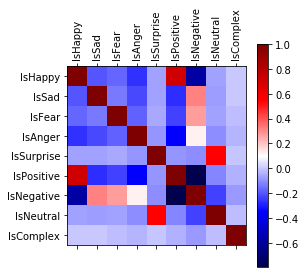

In [13]:
corr = afflex.corr()
plt.matshow(corr, cmap='seismic')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

## Data export

In [14]:
afflex_path = Fusiform.get_data_path('lexicon', 'afflex.csv')
afflex.to_csv(afflex_path)